## <i> Techniques and Insights for Improved Cardiovascular Health </i>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("cardio_train.csv" , sep=";")

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### <i> Dataset Overview </i>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### <i>Checking Missing Values </i>

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


### <i> Checking Outliers </i>

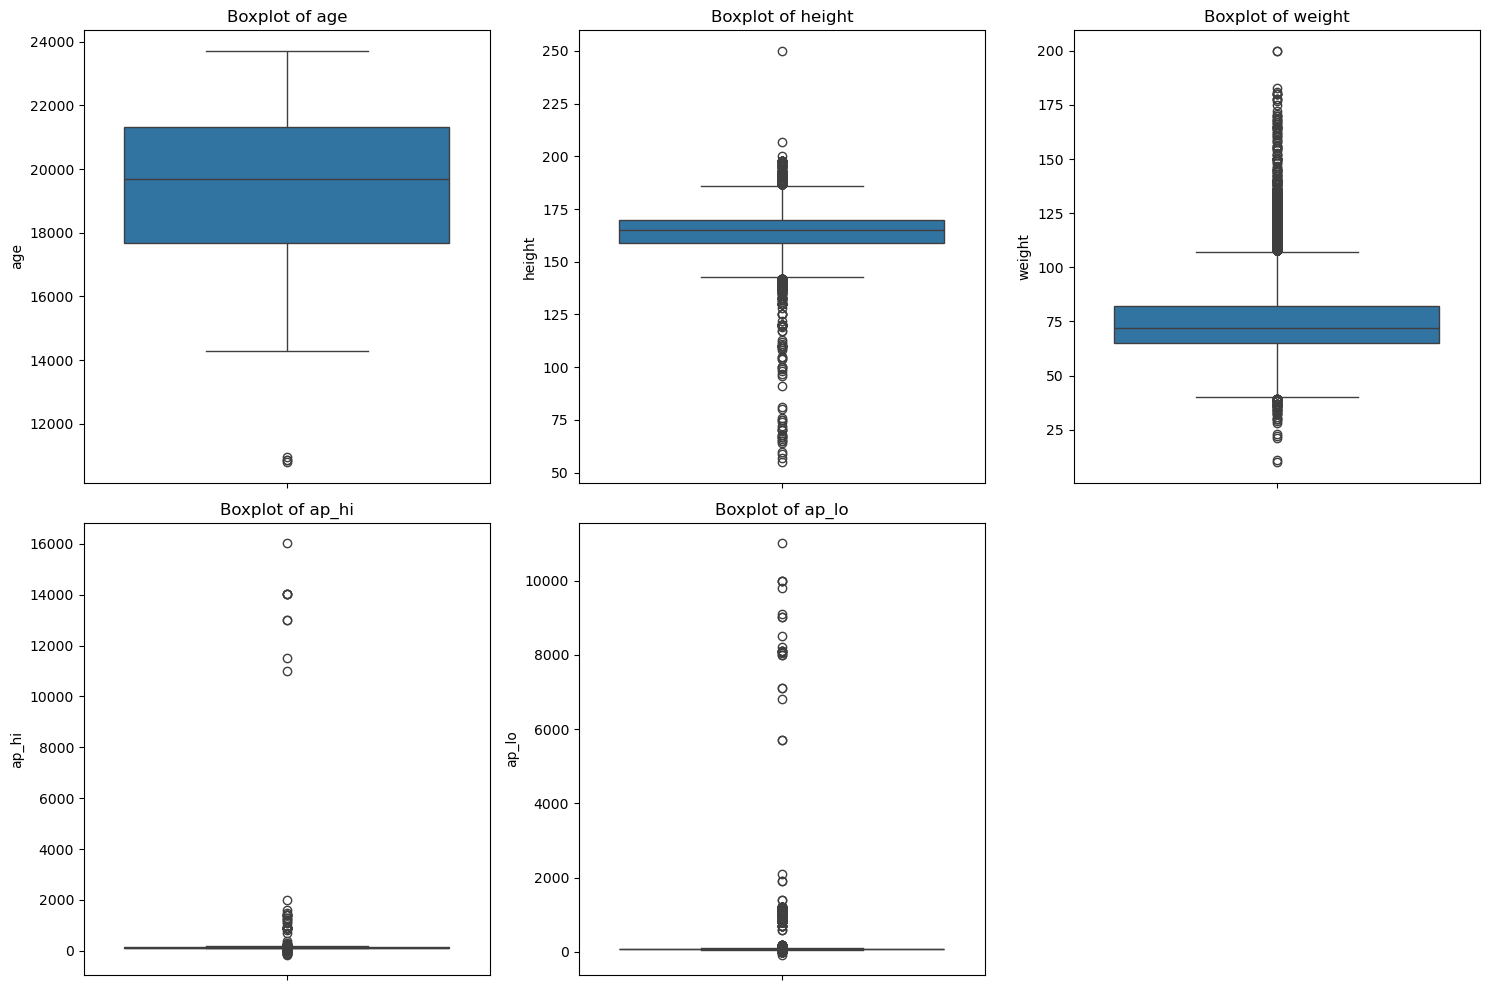

In [7]:
# Visualize outliers using boxplots for continuous variables
# Define continuous variables
continuous_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plotting boxplots for continuous variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [8]:
# Detecting outliers using Interquartile Range (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

### <i> Columns With The Outliers </i>

In [9]:
# Check outliers for each continuous variable
for col in continuous_vars:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nNumber of outliers in {col}: {len(outliers)}")
    print(outliers[[col]].head())



Number of outliers in age: 4
         age
6219   10878
22343  10798
30666  10859
55905  10964

Number of outliers in height: 519
     height
62      187
76      188
224      76
249     142
781     141

Number of outliers in weight: 1819
     weight
15    112.0
62    115.0
83    110.0
196   108.0
267   115.0

Number of outliers in ap_hi: 1435
     ap_hi
59     180
61     180
101    190
209     80
230    180

Number of outliers in ap_lo: 4632
    ap_lo
4      60
9      60
23     60
43     60
50     60


In [10]:
# Handle outliers: Option 1 - Removing them (you can adjust according to your analysis)
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Removing outliers for continuous variables
for col in continuous_vars:
    df = remove_outliers(df, col)

print(f"\nData shape after outlier removal: {df.shape}")


Data shape after outlier removal: (62502, 13)


### <i> Expolatory Data Analysis (EDA) </i>

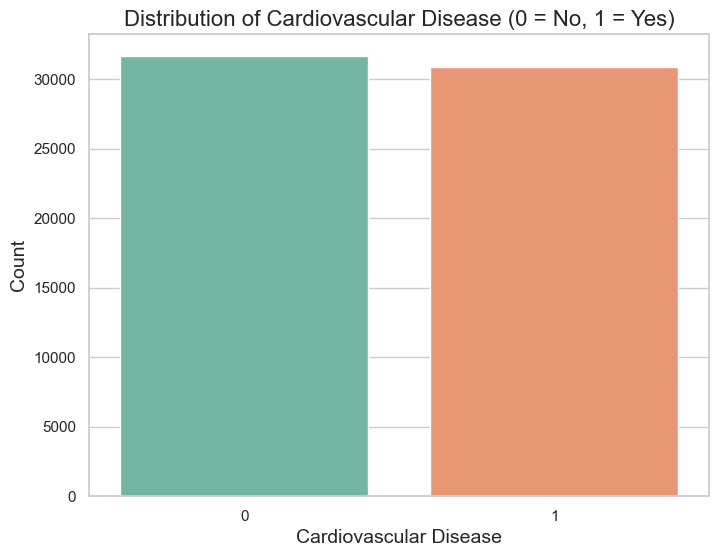

In [11]:
# Set style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Target Variable (Cardiovascular Disease)
plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df, palette='Set2')
plt.title('Distribution of Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=16)
plt.xlabel('Cardiovascular Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

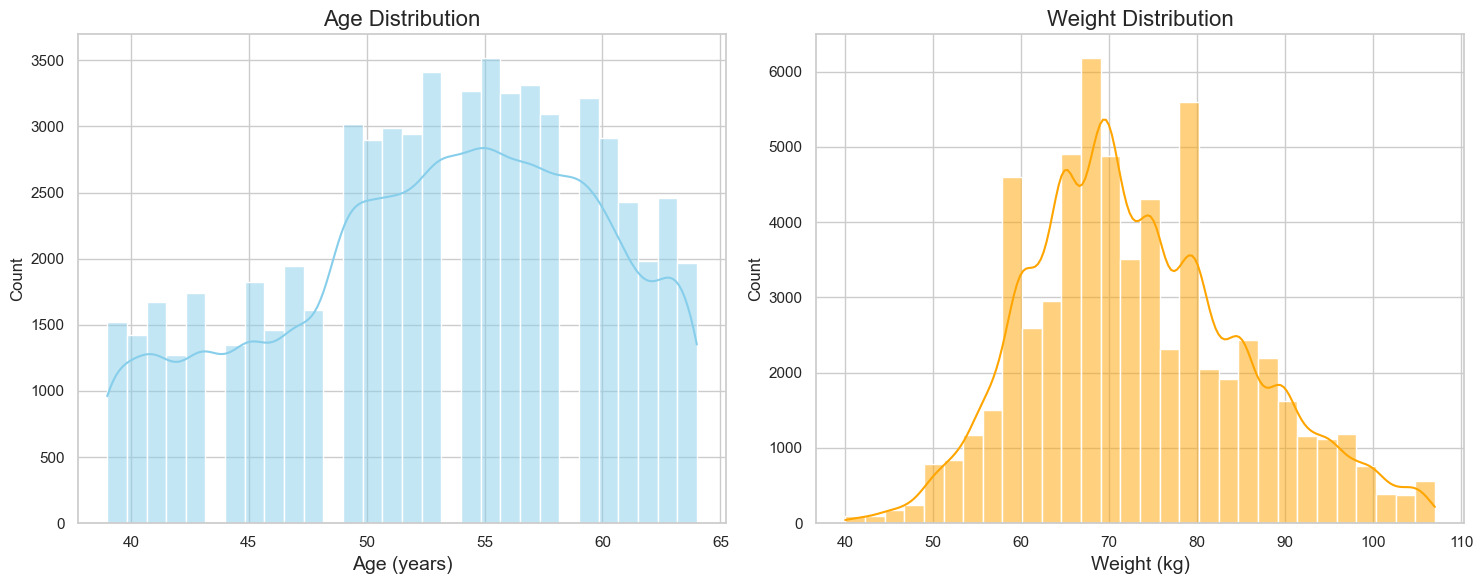

In [12]:
# 2. Visualizing Continuous Variables

# Age Distribution (assuming age is in days, we will convert it to years)
df['age_years'] = (df['age'] / 365).astype(int)

plt.figure(figsize=(15, 6))

# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age_years'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)

# Weight Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['weight'], kde=True, bins=30, color='orange')
plt.title('Weight Distribution', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Systolic Blood Pressure')

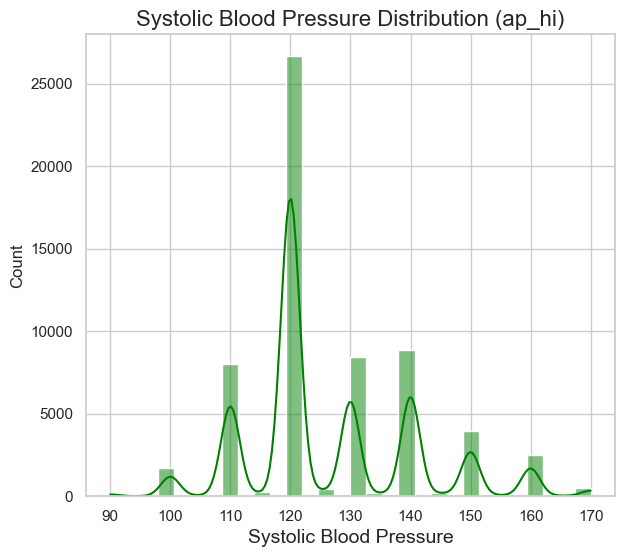

In [13]:
# Blood Pressure (Systolic vs Diastolic) Distribution
plt.figure(figsize=(15, 6))

# Systolic (ap_hi)
plt.subplot(1, 2, 1)
sns.histplot(df['ap_hi'], kde=True, bins=30, color='green')
plt.title('Systolic Blood Pressure Distribution (ap_hi)', fontsize=16)
plt.xlabel('Systolic Blood Pressure', fontsize=14)


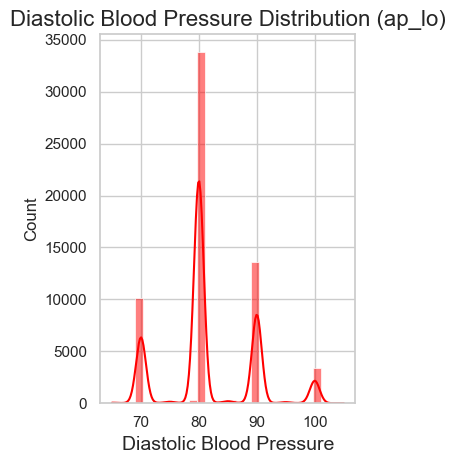

In [14]:
# Diastolic (ap_lo)
plt.subplot(1, 2, 2)
sns.histplot(df['ap_lo'], kde=True, bins=30, color='red')
plt.title('Diastolic Blood Pressure Distribution (ap_lo)', fontsize=16)
plt.xlabel('Diastolic Blood Pressure', fontsize=14)

plt.tight_layout()
plt.show()

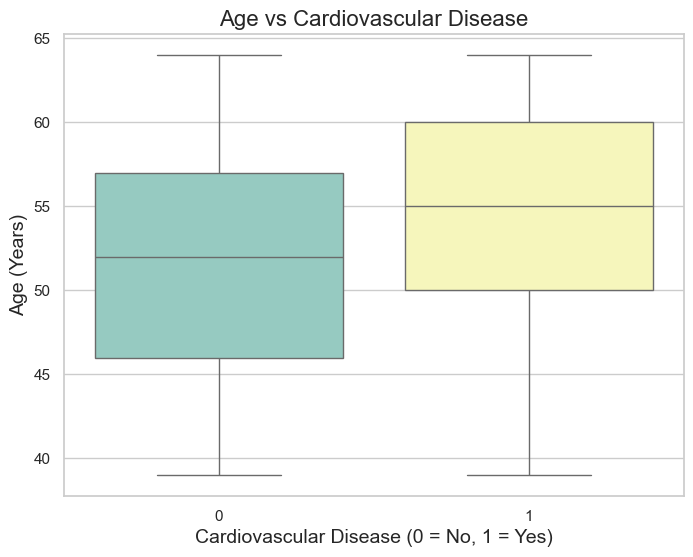

In [15]:
# 3. Relationship between Continuous Variables and Cardiovascular Disease

# Age vs. Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age_years', data=df, palette='Set3')
plt.title('Age vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Age (Years)', fontsize=14)
plt.show()

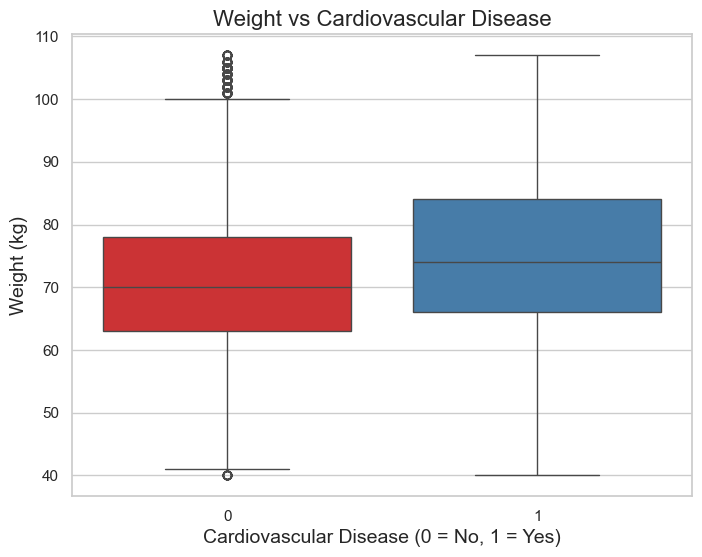

In [16]:
# Weight vs. Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='weight', data=df, palette='Set1')
plt.title('Weight vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.show()

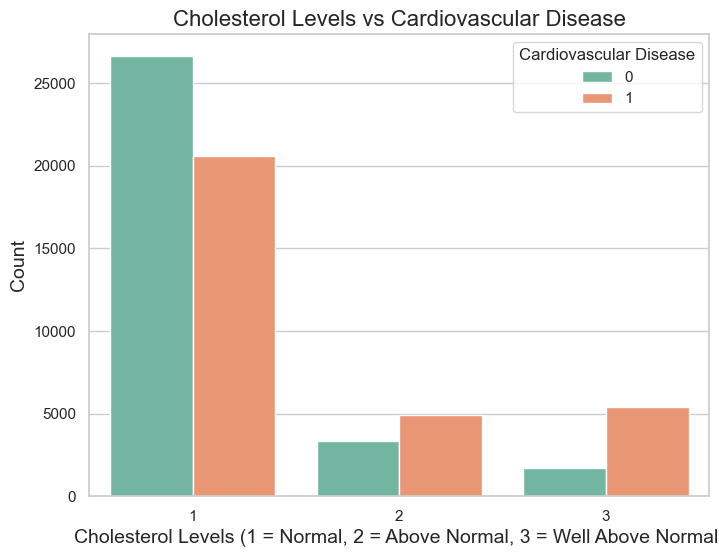

In [17]:
# 4. Categorical Variables vs Cardiovascular Disease

# Cholesterol Levels vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='cholesterol', hue='cardio', data=df, palette='Set2')
plt.title('Cholesterol Levels vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Cholesterol Levels (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cardiovascular Disease', loc='upper right')
plt.show()

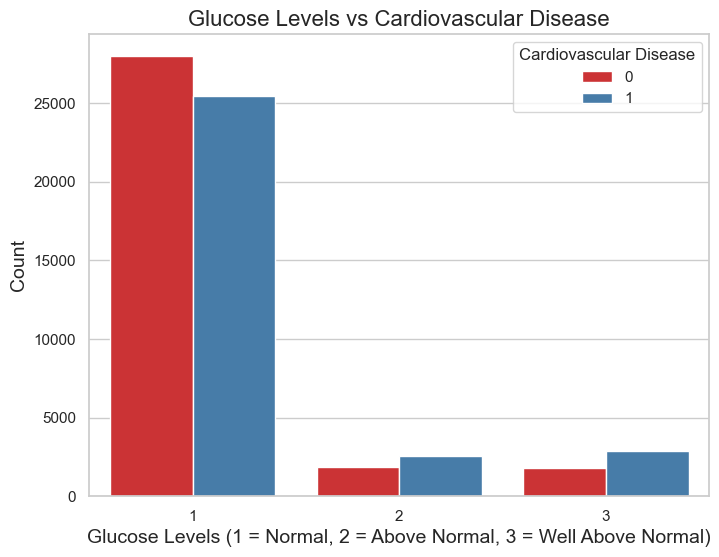

In [18]:
# Glucose Levels vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='gluc', hue='cardio', data=df, palette='Set1')
plt.title('Glucose Levels vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Glucose Levels (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cardiovascular Disease', loc='upper right')
plt.show()

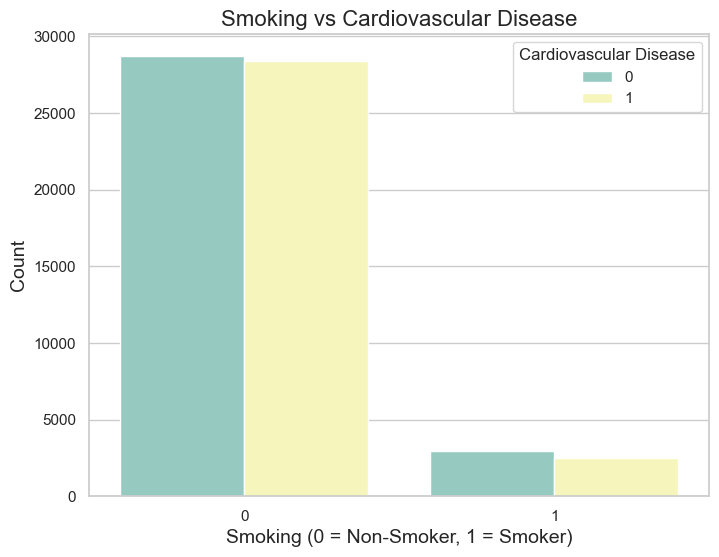

In [19]:
# Smoking vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='smoke', hue='cardio', data=df, palette='Set3')
plt.title('Smoking vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Smoking (0 = Non-Smoker, 1 = Smoker)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cardiovascular Disease', loc='upper right')
plt.show()


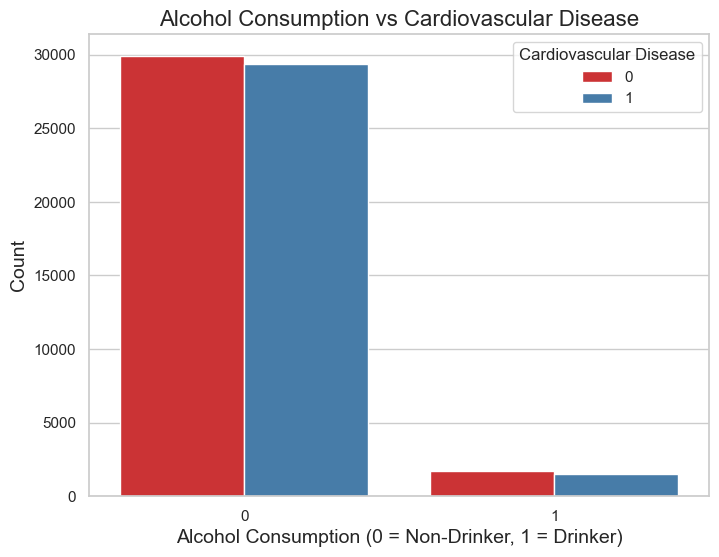

In [20]:
# Alcohol vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='alco', hue='cardio', data=df, palette='Set1')
plt.title('Alcohol Consumption vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Alcohol Consumption (0 = Non-Drinker, 1 = Drinker)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cardiovascular Disease', loc='upper right')
plt.show()

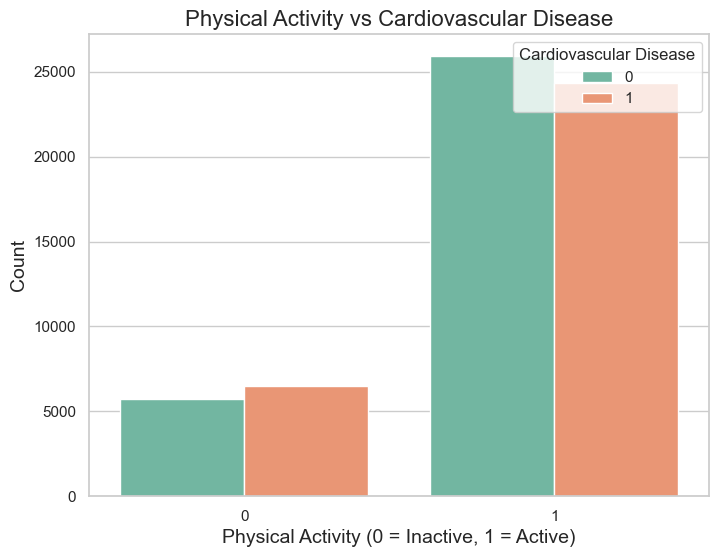

In [21]:
# Physical Activity vs Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.countplot(x='active', hue='cardio', data=df, palette='Set2')
plt.title('Physical Activity vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Physical Activity (0 = Inactive, 1 = Active)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cardiovascular Disease', loc='upper right')
plt.show()

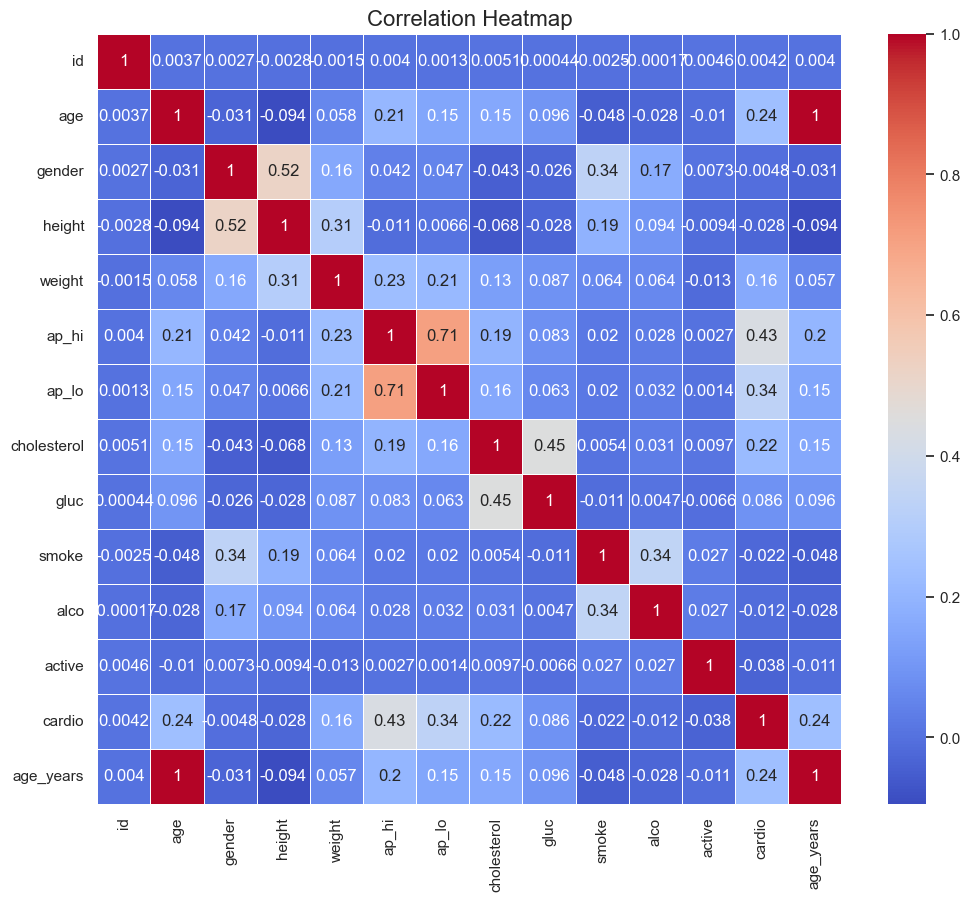

In [22]:
# 5. Correlation Heatmap for All Variables

plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [23]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [24]:
# 1. Split data into features (X) and target (y)
X = df.drop(columns=['cardio', 'id', 'age'])  # Drop id and target 'cardio', you may also exclude 'age_years' if already included
y = df['cardio']

In [25]:
# 2. Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
# 3. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# 4. Model Training and Evaluation

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

In [28]:
# 5. Model Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6327
           1       0.74      0.65      0.70      6174

    accuracy                           0.72     12501
   macro avg       0.72      0.72      0.72     12501
weighted avg       0.72      0.72      0.72     12501

Accuracy: 0.7176
ROC-AUC: 0.7810



In [29]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [30]:
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}\n")

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6327
           1       0.69      0.69      0.69      6174

    accuracy                           0.69     12501
   macro avg       0.69      0.69      0.69     12501
weighted avg       0.69      0.69      0.69     12501

Accuracy: 0.6929
ROC-AUC: 0.7503



In [31]:
# Support Vector Classifier (SVM with probability enabled)
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
y_prob_svc = svc.predict_proba(X_test_scaled)[:, 1]


In [32]:
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svc):.4f}\n")

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6327
           1       0.75      0.65      0.70      6174

    accuracy                           0.72     12501
   macro avg       0.73      0.72      0.72     12501
weighted avg       0.73      0.72      0.72     12501

Accuracy: 0.7233
ROC-AUC: 0.7789



In [33]:
# 6. Plotting ROC Curves for comparison
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)

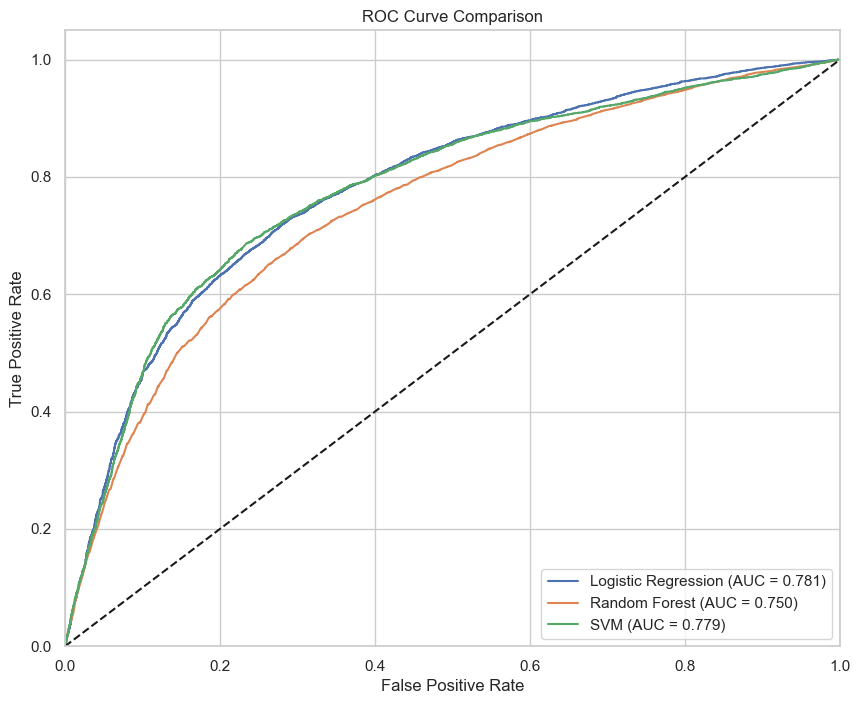

In [34]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.3f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVM (AUC = {auc(fpr_svc, tpr_svc):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

### Model Comparison Explanation

Based on the evaluation metrics provided for **Logistic Regression**, **Random Forest**, and **Support Vector Machine (SVM)**, we can analyze the performance of each model in terms of accuracy, precision, recall, F1-score, and ROC-AUC. Here’s the comparison:

#### 1. **Logistic Regression**
- **Accuracy**: 0.7176
- **Precision**: 0.70 (for class 0), 0.74 (for class 1)
- **Recall**: 0.78 (for class 0), 0.65 (for class 1)
- **F1-Score**: 0.74 (class 0), 0.70 (class 1)
- **ROC-AUC**: 0.7810

Logistic Regression has the highest **ROC-AUC** score (0.7810), indicating that it has the best trade-off between the true positive rate (recall) and the false positive rate. It performs well with class 0 in terms of recall (0.78), but it has slightly lower recall (0.65) for class 1. This means it predicts class 0 (no cardiovascular disease) more accurately than class 1 (cardiovascular disease).

#### 2. **Random Forest Classifier**
- **Accuracy**: 0.6929
- **Precision**: 0.70 (class 0), 0.69 (class 1)
- **Recall**: 0.70 (class 0), 0.69 (class 1)
- **F1-Score**: 0.70 for both classes
- **ROC-AUC**: 0.7503

Random Forest has the lowest performance in this comparison, with an accuracy of **0.6929** and the lowest **ROC-AUC** score of **0.7503**. Its performance is consistent between classes, but the overall metrics suggest it is not as good at distinguishing between the two classes compared to the other models.

#### 3. **Support Vector Machine (SVM)**
- **Accuracy**: 0.7233
- **Precision**: 0.70 (class 0), 0.75 (class 1)
- **Recall**: 0.79 (class 0), 0.65 (class 1)
- **F1-Score**: 0.74 (class 0), 0.70 (class 1)
- **ROC-AUC**: 0.7789

SVM has the best **accuracy** (0.7233) among the three models, and its performance is quite similar to Logistic Regression. The **ROC-AUC** score of **0.7789** is very close to Logistic Regression, and it performs well for class 0 but has lower recall (0.65) for class 1.

### Conclusion

- **Logistic Regression** is the best model overall because it achieves the highest **ROC-AUC** score of **0.7810**, meaning it balances true positives and false positives better than the other models.
- **Support Vector Machine** has the highest **accuracy** (0.7233) and performs similarly to Logistic Regression, but its **ROC-AUC** (0.7789) is slightly lower.
- **Random Forest** is the least effective model for this dataset, with lower accuracy (0.6929) and **ROC-AUC** (0.7503).

Thus, **Logistic Regression** can be considered the best model for this particular dataset and classification task, followed closely by **SVM**.